In [1]:
import torch
from torch import nn
import dltools

In [2]:
batch_size,num_steps = 32,25
train_iter,vocab = dltools.load_data_time_machine(batch_size,num_steps)


In [16]:
def get_gru_params(vocab_size,num_hiddens,device):
    num_inputs = num_outputs = vocab_size
    def normal(shape):
        return torch.randn(size=shape,device=device) *  0.01
    
    def three():
        return (normal((num_inputs,num_hiddens)),normal((num_hiddens,num_hiddens)),
                torch.zeros(num_hiddens,device=device))
    
    W_zz,Wh_hz,b_z = three()
    W_xr,Wh_hr,b_r = three()
    W_xh,Wh_hh,b_h = three()

    W_hq = normal((num_hiddens,num_outputs))
    b_q = torch.zeros(num_outputs,device=device)
    params = [W_zz,Wh_hz,b_z,W_xr,Wh_hr,b_r ,W_xh,Wh_hh,b_h,W_hq,b_q]
    for param in params:
        param.requires_grad_(True)

    return params

In [18]:
def init_gru_state(batch_size,num_hiddens,device):
    return (torch.zeros((batch_size,num_hiddens),device=device),)

In [24]:
def gru(inputs,state,params):
    [W_zz,Wh_hz,b_z,W_xr,Wh_hr,b_r ,W_xh,Wh_hh,b_h,W_hq,b_q] = params
    H, = state
    outputs = []
    for X in inputs:
        Z = torch.sigmoid((X @ W_zz) + (H @ Wh_hz) + b_z)
        R =  torch.sigmoid((X @ W_xr) + (H @ Wh_hr) + b_r)
        H_tilda = torch.sigmoid((X @ W_xh) + ((R * H) @ Wh_hh) + b_h)
        H = Z * H + (1-Z) * H_tilda
        Y = H@W_hq + b_q
        outputs.append(Y)
    return torch.cat(outputs,dim=0),(H,)

perplexity 7.5, 19166.1 tokens/sec on cuda:0
time travellere the the the the the the the the the the the the 
travellere the the the the the the the the the the the the 


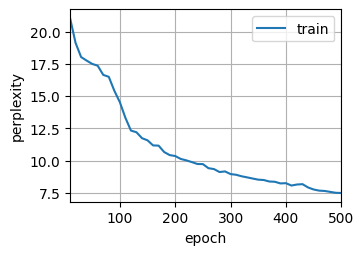

: 

In [ ]:
vocab_size,num_hiddens,device = len(vocab),256,dltools.try_gpu()
num_epoches,lr = 500,1
model = dltools.RNNModelScratch(vocab_size,num_hiddens,device,get_gru_params,init_gru_state,gru)
dltools.train_ch8(model,train_iter,vocab,lr,num_epoches,device)